In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

Please upload *ecommerce_sales_data.csv*, *ecommerce_support_data.csv* & *ecommerce_extended_data.txt* before beginning.

## Task 0: Importing & Accessing Data

In [32]:
#TODO: Import the data into pandas dataframes
sales_data = pd.read_csv('ecommerce_sales_data.csv',index_col='Order_ID')
support_data = pd.read_csv('ecommerce_support_data.csv',index_col='Ticket_ID')

In [33]:
print("Sales Data Overview:")
sales_data.head()

Sales Data Overview:


,Customer_ID,Product,Category,Order_Date,Quantity,Price,Total_Sale
Order_ID,,,,,,,
1,C045,Refrigerator,Electronics,2024-04-04,2,556,1112
2,C048,Blender,Clothing,2024-03-07,3,648,1944
3,C001,Refrigerator,Home & Kitchen,2024-01-02,4,211,844
4,C004,Blender,Electronics,2024-03-03,2,215,430
5,C004,Smartphone,Electronics,2024-03-08,4,327,1308


In [34]:
sales_data.describe(include='all')

,Customer_ID,Product,Category,Order_Date,Quantity,Price,Total_Sale
count,100,100,100,100,100.000000,100.000000,100.00000
unique,41,7,4,64,NaN,NaN,NaN
top,C001,Refrigerator,Electronics,2024-02-20,NaN,NaN,NaN
freq,5,19,44,3,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.410000,543.140000,1339.52000
std,NaN,NaN,NaN,NaN,1.064534,295.707405,1003.18741
min,NaN,NaN,NaN,NaN,1.000000,24.000000,33.00000
25%,NaN,NaN,NaN,NaN,2.000000,299.750000,477.25000
50%,NaN,NaN,NaN,NaN,2.000000,563.000000,965.50000
75%,NaN,NaN,NaN,NaN,3.000000,824.000000,2135.25000


In [35]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  100 non-null    object
 1   Product      100 non-null    object
 2   Category     100 non-null    object
 3   Order_Date   100 non-null    object
 4   Quantity     100 non-null    int64 
 5   Price        100 non-null    int64 
 6   Total_Sale   100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 6.2+ KB


In [36]:
print("\nSupport Data Overview:")
support_data.head()


Support Data Overview:


,Customer_ID,Ticket_Date,Issue_Type,Resolution_Status,Response_Time
Ticket_ID,,,,,
T001,C002,2024-01-29,Delivery Delay,Resolved,32.0
T002,C005,2024-02-28,Payment Issue,Pending,NaN
T003,C014,2024-01-07,Technical Issue,Resolved,36.0
T004,C013,2024-02-18,Technical Issue,Resolved,9.0
T005,C028,2024-04-07,Product Issue,Pending,26.0


In [37]:
support_data.describe(include='all')

,Customer_ID,Ticket_Date,Issue_Type,Resolution_Status,Response_Time
count,100,100,100,100,58.000000
unique,38,61,4,2,NaN
top,C002,2024-03-18,Product Issue,Resolved,NaN
freq,7,4,28,52,NaN
mean,NaN,NaN,NaN,NaN,35.172414
std,NaN,NaN,NaN,NaN,21.564378
min,NaN,NaN,NaN,NaN,2.000000
25%,NaN,NaN,NaN,NaN,17.250000
50%,NaN,NaN,NaN,NaN,34.500000
75%,NaN,NaN,NaN,NaN,53.750000


In [38]:
support_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, T001 to T100
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        100 non-null    object 
 1   Ticket_Date        100 non-null    object 
 2   Issue_Type         100 non-null    object 
 3   Resolution_Status  100 non-null    object 
 4   Response_Time      58 non-null     float64
dtypes: float64(1), object(4)
memory usage: 4.7+ KB


In [39]:
# Access specific columns
selected_columns = support_data[['Customer_ID', 'Issue_Type', 'Response_Time']]
selected_columns

,Customer_ID,Issue_Type,Response_Time
Ticket_ID,,,
T001,C002,Delivery Delay,32.0
T002,C005,Payment Issue,NaN
T003,C014,Technical Issue,36.0
T004,C013,Technical Issue,9.0
T005,C028,Product Issue,26.0
...,...,...,...
T096,C032,Payment Issue,NaN
T097,C043,Payment Issue,8.0
T098,C030,Technical Issue,4.0


In [40]:
# Access first 'n' rows
first_n_rows = support_data.iloc[:5]
first_n_rows

,Customer_ID,Ticket_Date,Issue_Type,Resolution_Status,Response_Time
Ticket_ID,,,,,
T001,C002,2024-01-29,Delivery Delay,Resolved,32.0
T002,C005,2024-02-28,Payment Issue,Pending,NaN
T003,C014,2024-01-07,Technical Issue,Resolved,36.0
T004,C013,2024-02-18,Technical Issue,Resolved,9.0
T005,C028,2024-04-07,Product Issue,Pending,26.0


In [46]:
# Access specific combination of rows & columns
subset_data = support_data.iloc[5:15, :].loc[:,['Customer_ID', 'Issue_Type', 'Resolution_Status']]
subset_data

,Customer_ID,Issue_Type,Resolution_Status
Ticket_ID,,,
T006,C002,Product Issue,Resolved
T007,C029,Delivery Delay,Resolved
T008,C007,Payment Issue,Pending
T009,C024,Delivery Delay,Pending
T010,C013,Delivery Delay,Pending
T011,C004,Delivery Delay,Pending
T012,C013,Technical Issue,Pending
T013,C001,Technical Issue,Resolved
T014,C014,Technical Issue,Resolved


## Task 1: Data Cleaning

In [47]:
# TODO: Fill missing 'Response_Time' with the mean of the column in support_data (replace all NaNs with the mean)
support_data.loc[support_data['Response_Time'].isna(), 'Response_Time'] = support_data['Response_Time'].mean()

In [48]:
print("\nCleaned Support Data:")
support_data


Cleaned Support Data:


,Customer_ID,Ticket_Date,Issue_Type,Resolution_Status,Response_Time
Ticket_ID,,,,,
T001,C002,2024-01-29,Delivery Delay,Resolved,32.000000
T002,C005,2024-02-28,Payment Issue,Pending,35.172414
T003,C014,2024-01-07,Technical Issue,Resolved,36.000000
T004,C013,2024-02-18,Technical Issue,Resolved,9.000000
T005,C028,2024-04-07,Product Issue,Pending,26.000000
...,...,...,...,...,...
T096,C032,2024-03-31,Payment Issue,Resolved,35.172414
T097,C043,2024-02-24,Payment Issue,Resolved,8.000000
T098,C030,2024-02-15,Technical Issue,Resolved,4.000000


## Task 2: Data Transformation & Filtering

In [49]:
# TODO: Calculate Total_Sale (Quantity * Price) as a new column in sales_data
sales_data['Total_Sale'] = sales_data['Quantity'] * sales_data['Price']
sales_data

,Customer_ID,Product,Category,Order_Date,Quantity,Price,Total_Sale
Order_ID,,,,,,,
1,C045,Refrigerator,Electronics,2024-04-04,2,556,1112
2,C048,Blender,Clothing,2024-03-07,3,648,1944
3,C001,Refrigerator,Home & Kitchen,2024-01-02,4,211,844
4,C004,Blender,Electronics,2024-03-03,2,215,430
5,C004,Smartphone,Electronics,2024-03-08,4,327,1308
...,...,...,...,...,...,...,...
96,C014,Sneakers,Electronics,2024-04-08,4,570,2280
97,C022,Smartphone,Electronics,2024-02-07,1,699,699
98,C049,Laptop,Footwear,2024-02-12,3,668,2004


In [50]:
# TODO: Create a new column 'Rating' in support_data and assign rating based on response time
# If response_time < 24, it should be "Good"
# If 24 <= respionse time <= 48, it should be "Average"
# Otherwise, it should be "Poor"
# Complete the function 'assign_rating'

def assign_rating(response_time):
    if response_time < 24:
        return "Good"
    if 24 <= response_time <= 48:
        return "Average"
    return "Poor"

support_data['Rating'] = support_data['Response_Time'].map(assign_rating)
support_data

,Customer_ID,Ticket_Date,Issue_Type,Resolution_Status,Response_Time,Rating
Ticket_ID,,,,,,
T001,C002,2024-01-29,Delivery Delay,Resolved,32.000000,Average
T002,C005,2024-02-28,Payment Issue,Pending,35.172414,Average
T003,C014,2024-01-07,Technical Issue,Resolved,36.000000,Average
T004,C013,2024-02-18,Technical Issue,Resolved,9.000000,Good
T005,C028,2024-04-07,Product Issue,Pending,26.000000,Average
...,...,...,...,...,...,...
T096,C032,2024-03-31,Payment Issue,Resolved,35.172414,Average
T097,C043,2024-02-24,Payment Issue,Resolved,8.000000,Good
T098,C030,2024-02-15,Technical Issue,Resolved,4.000000,Good


In [51]:
# Apply function to add the Rating column
support_data['Rating'] = support_data['Response_Time'].apply(assign_rating)

In [52]:
sales_data.head()

,Customer_ID,Product,Category,Order_Date,Quantity,Price,Total_Sale
Order_ID,,,,,,,
1,C045,Refrigerator,Electronics,2024-04-04,2,556,1112
2,C048,Blender,Clothing,2024-03-07,3,648,1944
3,C001,Refrigerator,Home & Kitchen,2024-01-02,4,211,844
4,C004,Blender,Electronics,2024-03-03,2,215,430
5,C004,Smartphone,Electronics,2024-03-08,4,327,1308


In [53]:
support_data.head()

,Customer_ID,Ticket_Date,Issue_Type,Resolution_Status,Response_Time,Rating
Ticket_ID,,,,,,
T001,C002,2024-01-29,Delivery Delay,Resolved,32.000000,Average
T002,C005,2024-02-28,Payment Issue,Pending,35.172414,Average
T003,C014,2024-01-07,Technical Issue,Resolved,36.000000,Average
T004,C013,2024-02-18,Technical Issue,Resolved,9.000000,Good
T005,C028,2024-04-07,Product Issue,Pending,26.000000,Average


In [54]:
# TODO: Filter Electronics category sales. Create a new dataframe with just sales related to Electronics
electronics_sales = sales_data[sales_data['Category'] == 'Electronics']
print("\nFiltered Electronics Sales:")
electronics_sales


Filtered Electronics Sales:


,Customer_ID,Product,Category,Order_Date,Quantity,Price,Total_Sale
Order_ID,,,,,,,
1,C045,Refrigerator,Electronics,2024-04-04,2,556,1112
4,C004,Blender,Electronics,2024-03-03,2,215,430
5,C004,Smartphone,Electronics,2024-03-08,4,327,1308
6,C040,Headphones,Electronics,2024-04-07,4,156,624
7,C010,Laptop,Electronics,2024-03-28,2,972,1944
9,C022,Blender,Electronics,2024-01-06,2,113,226
10,C037,Refrigerator,Electronics,2024-02-15,1,911,911
13,C025,Blender,Electronics,2024-04-07,1,180,180
14,C025,Headphones,Electronics,2024-02-05,2,167,334


## Task 3: Grouping, Aggregation & Plotting

In [55]:
# TODO: Get Total sales by category from sales_data
category_sales_summary = sales_data[['Category', 'Total_Sale']].groupby('Category', ).aggregate('sum')
print("\nTotal Sales by Category:")
category_sales_summary


Total Sales by Category:


,Total_Sale
Category,
Clothing,19112
Electronics,60852
Footwear,25728
Home & Kitchen,28260


In [60]:
# TODO: Get support tickets count and average response time by issue type from support_data
support_summary = support_data.groupby('Issue_Type').aggregate({'Customer_ID': 'count', 'Response_Time': 'mean'})
support_summary.columns = ['Ticket_Count', 'Response_Time']
print("\nSupport Summary by Issue Type:")
support_summary


Support Summary by Issue Type:


,Ticket_Count,Response_Time
Issue_Type,,
Delivery Delay,23,38.734633
Payment Issue,26,35.419098
Product Issue,28,33.216749
Technical Issue,23,33.712144


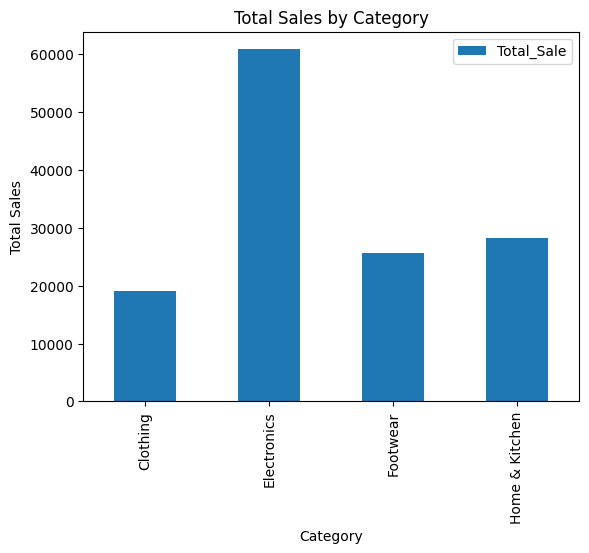

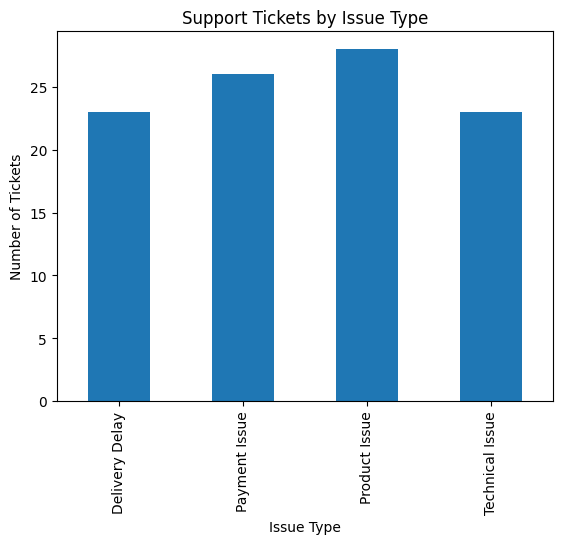

In [61]:
# Plot total sales by category
category_sales_summary.plot(kind='bar')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

# Plot support tickets by issue type
support_summary['Ticket_Count'].plot(kind='bar')
plt.title("Support Tickets by Issue Type")
plt.xlabel("Issue Type")
plt.ylabel("Number of Tickets")
plt.show()

## Task 4: Regular Expressions

In [62]:
with open('ecommerce_extended_data.txt', 'r') as file:
    content = file.read()

In [64]:
# TODO: Regex for Customer IDs
customer_id_pattern = r"Customer ID: (\w\d{3})"
customer_ids = re.findall(customer_id_pattern, content)
print("Customer IDs:", customer_ids)

Customer IDs: ['C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010', 'C011', 'C012', 'C013', 'C014', 'C015', 'C016', 'C017', 'C018', 'C019', 'C020', 'C021', 'C022', 'C023', 'C024', 'C025', 'C026', 'C027', 'C028', 'C029', 'C030']


In [65]:
# TOOD: Regex for US-format Phone Numbers (e.g., (123) 456-7890)
us_phone_pattern = r"\(\d{3}\) \d{3}\-\d{3}"
phone_numbers = re.findall(us_phone_pattern, content)
print("Phone Numbers:", phone_numbers)

Phone Numbers: ['(555) 987-654', '(202) 555-014', '(415) 555-019', '(650) 555-432', '(212) 555-567', '(718) 555-987', '(323) 555-123', '(213) 555-456', '(202) 555-678', '(917) 555-789', '(310) 555-014', '(646) 555-019', '(510) 555-777', '(212) 555-012', '(415) 555-567', '(617) 555-024', '(415) 555-456', '(408) 555-015', '(213) 555-018', '(718) 555-019', '(626) 555-333', '(646) 555-017', '(505) 555-017', '(408) 555-014', '(323) 555-567', '(808) 555-013', '(323) 555-012', '(702) 555-567', '(416) 555-018', '(202) 555-019']


In [ ]:
# TODO: Regex for Emails
email_pattern = r"[\w\.]{1,}\@[\w\.]{1,}" # this is bad but works
emails = re.findall(email_pattern, content)
print("Emails:", emails)

Emails: ['john_doe45@example.com.', 'jane.smith@retailstore.com', 'alex.brown@website.com', 'emily.jones@shoponline.com', 'michael_lee@retailmail.com', 'alice.wonder@webmail.org', 'robert_smith@businessmail.com', 'laura.baker@retailprovider.com', 'kevin.peters@example.net', 'andrew.jones@mailservice.com', 'diane.wood@supportemail.com', 'lucas.gray@onlineshop.com', 'simon.cook@ecommail.com', 'michael.scott@officeplace.com.', 'linda.johnson@shopsupport.org', 'anna.morris@companysite.net', 'tony.stark@heroindustries.com', 'sara.conner@terminator.net', 'rebecca.white@marketplace.org', 'ryan.hall@webstore.com', 'emily.black@consumeremail.com', 'kevin.green@globalmail.net', 'thomas.clark@servicemail.org', 'matthew.cox@retailoutlet.com', 'alice.miller@shopsite.com', 'paul.morris@electronicsstore.com', 'emily.stone@fashionmail.org', 'support@servicecenter.com', 'charlie.brown@peanutsmail.com', 'mia.jones@bargainstore.org']
